This is a Kaggle Dataset on [Netflix Movies and TV Shows](https://https://www.kaggle.com/datasets/shivamb/netflix-shows). It contains data of more than 8,500 movies and TV shows available on Netflix.



In [1]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read in the Netflix CSV as a DataFrame
df = pd.read_csv("netflix_dataset.csv")

In [2]:
# Start coding here! Use as many cells as you like
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [3]:
#looking at the first few rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
#checking data types
df.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
rating,object
duration,object


In [5]:
#looking at the null values
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [6]:
#checking if there are any duplicates
duplicates_all_columns = df.duplicated()
print(duplicates_all_columns)

0       False
1       False
2       False
3       False
4       False
        ...  
8802    False
8803    False
8804    False
8805    False
8806    False
Length: 8807, dtype: bool


In [7]:
#creating a dataframe for movies
netflix_movies=df[df['type']=='Movie']

In [8]:
#creating a column for the integer value of the duration. The duration column is '# min' and I want to extract the number
netflix_movies['duration_int'] = netflix_movies['duration'].str.replace(' min', '', regex=False).astype('Int64')

/tmp/ipython-input-1869177127.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_movies['duration_int'] = netflix_movies['duration'].str.replace(' min', '', regex=False).astype('Int64')


In [9]:
#checking to confirm the change
netflix_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_int
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",125
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,104
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,127


In [10]:
#creating a dataframe for movies from 1989
recent_netflix_movies=netflix_movies.loc[netflix_movies['release_year'] > 1989]

In [11]:
#creating a dataframe for movies in the 90s
nineties_netflix_movies=recent_netflix_movies.loc[recent_netflix_movies['release_year'] < 2000]

In [12]:
#looking at the top values in the dataframe
nineties_netflix_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_int
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",125
22,s23,Movie,Avvai Shanmughi,K.S. Ravikumar,"Kamal Hassan, Meena, Gemini Ganesan, Heera Raj...",NaN,"September 21, 2021",1996,TV-PG,161 min,"Comedies, International Movies",Newly divorced and denied visitation rights wi...,161
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,166
26,s27,Movie,Minsara Kanavu,Rajiv Menon,"Arvind Swamy, Kajol, Prabhu Deva, Nassar, S.P....",NaN,"September 21, 2021",1997,TV-PG,147 min,"Comedies, International Movies, Music & Musicals",A tangled love triangle ensues when a man fall...,147
114,s115,Movie,Anjaam,Rahul Rawail,"Madhuri Dixit, Shah Rukh Khan, Tinnu Anand, Jo...",India,"September 2, 2021",1994,TV-14,143 min,"Dramas, International Movies, Thrillers",A wealthy industrialist’s dangerous obsession ...,143


In [13]:
nineties_netflix_movies.describe()

,release_year,duration_int
count,241.000000,241.0
mean,1995.107884,113.842324
std,2.873148,32.199509
min,1990.000000,28.0
25%,1993.000000,94.0
50%,1995.000000,108.0
75%,1998.000000,130.0
max,1999.000000,204.0


In [14]:
#creating a dataframe for action movies in the 90s
action_movies=nineties_netflix_movies.loc[nineties_netflix_movies['listed_in'].str.contains('Action', na=False)]

In [15]:
action_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_int
134,s135,Movie,Clear and Present Danger,Phillip Noyce,"Harrison Ford, Willem Dafoe, Anne Archer, Joaq...","United States, Mexico","September 1, 2021",1994,PG-13,142 min,"Action & Adventure, Dramas","When the president's friend is murdered, CIA D...",142
135,s136,Movie,Cliffhanger,Renny Harlin,"Sylvester Stallone, John Lithgow, Michael Rook...","United States, Italy, France, Japan","September 1, 2021",1993,R,113 min,Action & Adventure,Ranger Gabe Walker and his partner are called ...,113
149,s150,Movie,I Got the Hook Up,Michael Martin,"Master P, Anthony Johnson, Gretchen Palmer, Fr...",United States,"September 1, 2021",1998,R,93 min,"Action & Adventure, Comedies",After getting their hands on a misdirected shi...,93
164,s165,Movie,Mystery Men,Kinka Usher,"Ben Stiller, Hank Azaria, William H. Macy, Jan...",United States,"September 1, 2021",1999,PG-13,121 min,"Action & Adventure, Comedies",A team of far-from-super heroes try to earn re...,121
183,s184,Movie,In the Line of Fire,Wolfgang Petersen,"Clint Eastwood, John Malkovich, Rene Russo, Dy...",United States,"August 31, 2021",1993,R,129 min,"Action & Adventure, Classic Movies",A twisted yet ingenious killer torments a vete...,129


In [16]:
#getting the number of short action movies released in the 1990s
short_action_movies_df = action_movies[action_movies['duration_int'] < 90]
short_movie_count = len(short_action_movies_df)
print('The number of short action movies released in the 1990s is ' + str(short_movie_count))

The number of short action movies released in the 1990s is 10


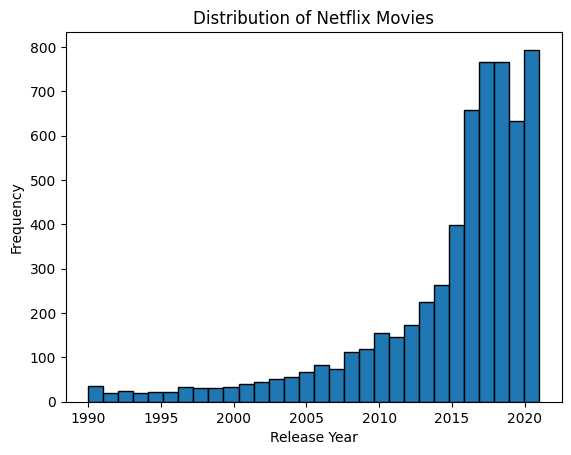

In [17]:
#creating a histogram for creating a dataframe for movies from 1989
plt.hist(recent_netflix_movies['release_year'], bins=30, edgecolor='black')

plt.xlabel("Release Year")
plt.ylabel("Frequency")
plt.title("Distribution of Netflix Movies")

plt.show()

In [18]:
#creating a dataframe for tv shows
tv_shows=df[df['type']== 'TV Show']

#creating a column for duration that extracts the number of season without the word season
tv_shows['duration_int']=tv_shows['duration'].str.replace(' Seasons', '', regex=False).str.replace(' Season', '', regex=False).astype('Int64')
tv_shows.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2676 entries, 1 to 8803
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       2676 non-null   object
 1   type          2676 non-null   object
 2   title         2676 non-null   object
 3   director      230 non-null    object
 4   cast          2326 non-null   object
 5   country       2285 non-null   object
 6   date_added    2666 non-null   object
 7   release_year  2676 non-null   int64 
 8   rating        2674 non-null   object
 9   duration      2676 non-null   object
 10  listed_in     2676 non-null   object
 11  description   2676 non-null   object
 12  duration_int  2676 non-null   Int64 
dtypes: Int64(1), int64(1), object(11)
memory usage: 295.3+ KB


/tmp/ipython-input-1914925044.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows['duration_int']=tv_shows['duration'].str.replace(' Seasons', '', regex=False).str.replace(' Season', '', regex=False).astype('Int64')


In [19]:
#looking at tv shows created in the US
tv_shows_us=tv_shows[tv_shows['country'].str.contains('United States', na=False)]
tv_shows_us.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_int
15,s16,TV Show,Dear White People,NaN,"Logan Browning, Brandon P. Bell, DeRon Horton,...",United States,"September 22, 2021",2021,TV-MA,4 Seasons,"TV Comedies, TV Dramas",Students of color navigate the daily slights a...,4
40,s41,TV Show,He-Man and the Masters of the Universe,NaN,"Yuri Lowenthal, Kimberly Brooks, Antony Del Ri...",United States,"September 16, 2021",2021,TV-Y7,1 Season,"Kids' TV, TV Sci-Fi & Fantasy",Mighty teen Adam and his heroic squad of misfi...,1
55,s56,TV Show,Nailed It,NaN,"Nicole Byer, Jacques Torres",United States,"September 15, 2021",2021,TV-PG,6 Seasons,Reality TV,Home bakers with a terrible track record take ...,6
67,s68,TV Show,Saved by the Bell,NaN,"Mark-Paul Gosselaar, Tiffani Thiessen, Mario L...",United States,"September 15, 2021",1994,TV-PG,9 Seasons,"Kids' TV, TV Comedies","From middle school to college, best friends Za...",9
82,s83,TV Show,Lucifer,NaN,"Tom Ellis, Lauren German, Kevin Alejandro, D.B...",United States,"September 10, 2021",2021,TV-14,6 Seasons,"Crime TV Shows, TV Comedies, TV Dramas","Bored with being the Lord of Hell, the devil r...",6
95,s96,TV Show,The Circle,NaN,Michelle Buteau,"United States, United Kingdom","September 8, 2021",2021,TV-MA,3 Seasons,Reality TV,Status and strategy collide in this social exp...,3
97,s98,TV Show,Kid Cosmic,NaN,"Jack Fisher, Tom Kenny, Amanda C. Miller, Kim ...",United States,"September 7, 2021",2021,TV-Y7,2 Seasons,"Kids' TV, TV Comedies, TV Sci-Fi & Fantasy",A boy's superhero dreams come true when he fin...,2
99,s100,TV Show,On the Verge,NaN,"Julie Delpy, Elisabeth Shue, Sarah Jones, Alex...","France, United States","September 7, 2021",2021,TV-MA,1 Season,"TV Comedies, TV Dramas","Four women — a chef, a single mom, an heiress ...",1
106,s107,TV Show,Bunk'd,NaN,"Peyton List, Karan Brar, Skai Jackson, Miranda...",United States,"September 5, 2021",2021,TV-G,5 Seasons,"Kids' TV, TV Comedies","The Ross siblings of Disney's hit series ""Jess...",5
111,s112,TV Show,Sharkdog,NaN,"Liam Mitchell, Dee Bradley Baker, Grey Griffin...","United States, Singapore","September 3, 2021",2021,TV-Y,1 Season,Kids' TV,"Half shark, half dog with a big heart and a be...",1


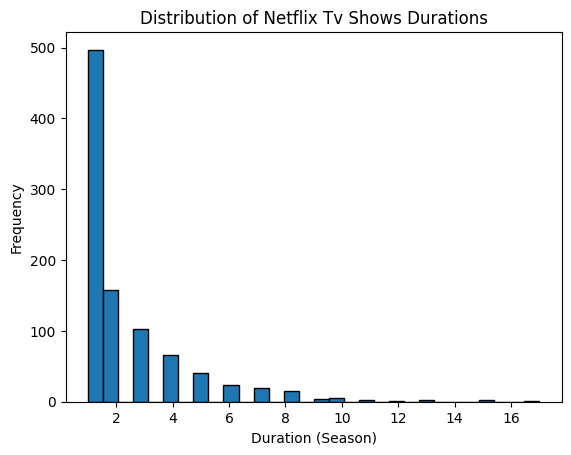

In [20]:
#looking at American TV show durations
plt.hist(tv_shows_us['duration_int'], bins=30, edgecolor='black')

plt.xlabel("Duration (Season)")
plt.ylabel("Frequency")
plt.title("Distribution of Netflix Tv Shows Durations")

plt.show()

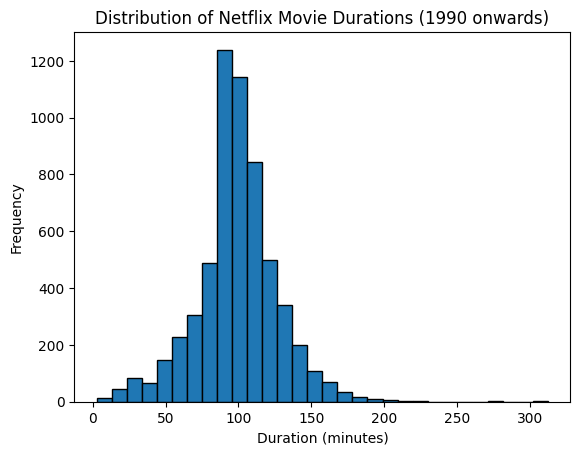

In [21]:
#looking at Netflix movie durations
plt.hist(recent_netflix_movies['duration_int'], bins=30, edgecolor='black')

plt.xlabel("Duration (minutes)")
plt.ylabel("Frequency")
plt.title("Distribution of Netflix Movie Durations (1990 onwards)")

plt.show()

In [22]:
tv_shows_international= tv_shows[~tv_shows['country'].str.contains('United States', na=False)]
tv_shows_international.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_int
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,1
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,9
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B...",1
11,s12,TV Show,Bangkok Breaking,Kongkiat Komesiri,"Sukollawat Kanarot, Sushar Manaying, Pavarit M...",NaN,"September 23, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...","Struggling to earn a living in Bangkok, a man ...",1
14,s15,TV Show,Crime Stories: India Detectives,NaN,NaN,NaN,"September 22, 2021",2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries",Cameras following Bengaluru police on the job ...,1
17,s18,TV Show,Falsa identidad,NaN,"Luis Ernesto Franco, Camila Sodi, Sergio Goyri...",Mexico,"September 22, 2021",2020,TV-MA,2 Seasons,"Crime TV Shows, Spanish-Language TV Shows, TV ...",Strangers Diego and Isabel flee their home in ...,2


In [32]:
#Identifying the number of tv shows across genres
tv_shows_fantasy=tv_shows[tv_shows['listed_in'].str.contains('Fantasy', na=False)]
print(len(tv_shows_fantasy))
tv_shows_international=tv_shows[tv_shows['listed_in'].str.contains('International TV Shows', na=False)]
print(len(tv_shows_international))
tv_shows_reality=tv_shows[tv_shows['listed_in'].str.contains('Reality TV',na=False)]
print(len(tv_shows_reality))
tv_shows_action=tv_shows[tv_shows['listed_in'].str.contains('Action',na=False)]
print(len(tv_shows_action))
tv_shows_crime=tv_shows[tv_shows['listed_in'].str.contains('Crime',na=False)]
print(len(tv_shows_crime))


84
1351
255
168
470
